# Problem Statement : Classification(Bankruptcy)

Following steps are followed:
1. Read the dataset and understand the features and target variable.
2. Encode independent features. 
3. Separate the dependant variable from the rest of the train data 
4. Split the dataset into training and test data ( Take 80:20 ratio). 
5. Apply PCA on the independent features of train data. 
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 
7. Transform the data using PCA ( select optimum number of PCs). 
8. Apply KMeans algorithm on the above transformed data.
9. Select optimal number of clusters and form clusters out of the train data.
10. Create a new column in the train data and populate it with the cluster labels. 
11. Transform the test data using the same PCA object that was fit on the train data. 
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 
13. Apply SVC model on train dataset and predict target for test dataset. 
14. Check accuracy and confusion matrix.

In [585]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [586]:
df_bankrupcy = pd.read_csv("Qualitative_Bankruptcy.data.txt", names= ["IR", "MR", "FF", "Credibility", "Competitiveness", "OR", "Class"])

In [587]:
df_bankrupcy.head()

,IR,MR,FF,Credibility,Competitiveness,OR,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [588]:
df_bankrupcy.shape

(250, 7)

In [589]:
df_bankrupcy.info()
# No null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR                 250 non-null object
MR                 250 non-null object
FF                 250 non-null object
Credibility        250 non-null object
Competitiveness    250 non-null object
OR                 250 non-null object
Class              250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [590]:
df_bankrupcy.groupby(df_bankrupcy['Class']).count()
#class distribution

,IR,MR,FF,Credibility,Competitiveness,OR
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


In [591]:
df_bankrupcy[~df_bankrupcy.applymap(np.isreal).all(1)].count()

IR                 250
MR                 250
FF                 250
Credibility        250
Competitiveness    250
OR                 250
Class              250
dtype: int64

In [592]:
df_bankrupcy.isna().sum()

IR                 0
MR                 0
FF                 0
Credibility        0
Competitiveness    0
OR                 0
Class              0
dtype: int64

In [593]:
from sklearn import preprocessing


In [594]:
labels = df_bankrupcy['Class']
labels

0      NB
1      NB
2      NB
3      NB
4      NB
5      NB
6      NB
7      NB
8      NB
9      NB
10     NB
11     NB
12     NB
13     NB
14     NB
15     NB
16     NB
17     NB
18     NB
19     NB
20     NB
21     NB
22     NB
23     NB
24     NB
25     NB
26     NB
27     NB
28     NB
29     NB
       ..
220     B
221     B
222     B
223     B
224     B
225     B
226     B
227     B
228     B
229     B
230     B
231     B
232     B
233     B
234     B
235     B
236     B
237     B
238     B
239     B
240     B
241     B
242     B
243     B
244     B
245     B
246     B
247     B
248     B
249     B
Name: Class, Length: 250, dtype: object

In [595]:
df_bankrupcy.drop("Class",axis = 1, inplace = True)

In [596]:
labels.shape

(250,)

In [597]:
df_bankrupcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
IR                 250 non-null object
MR                 250 non-null object
FF                 250 non-null object
Credibility        250 non-null object
Competitiveness    250 non-null object
OR                 250 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


In [598]:
le = preprocessing.LabelEncoder()
cat_columns = list(df_bankrupcy.select_dtypes(object, np.number))
df_bankrupcy[cat_columns] = df_bankrupcy[cat_columns].apply(le.fit_transform)

In [599]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
X = OHE.fit_transform(df_bankrupcy).toarray()

C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [600]:
df_bankrupcy.head(20)

,IR,MR,FF,Credibility,Competitiveness,OR
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1
5,0,0,2,2,2,0
6,2,2,0,2,2,2
7,2,2,2,0,0,2
8,2,2,0,2,0,2
9,2,2,0,0,2,2


In [601]:
X.shape

(250, 18)

In [602]:
labels.shape

(250,)

In [603]:
from sklearn.model_selection import train_test_split

In [604]:
train_set, test_set, train_labels, test_labels = train_test_split(X, labels, test_size=0.20, random_state=7)

In [605]:
train_set.shape

(200, 18)

#Performing some EDA to see if PCA will be effective. There should be correlation in the
# data to have any effect of PCA

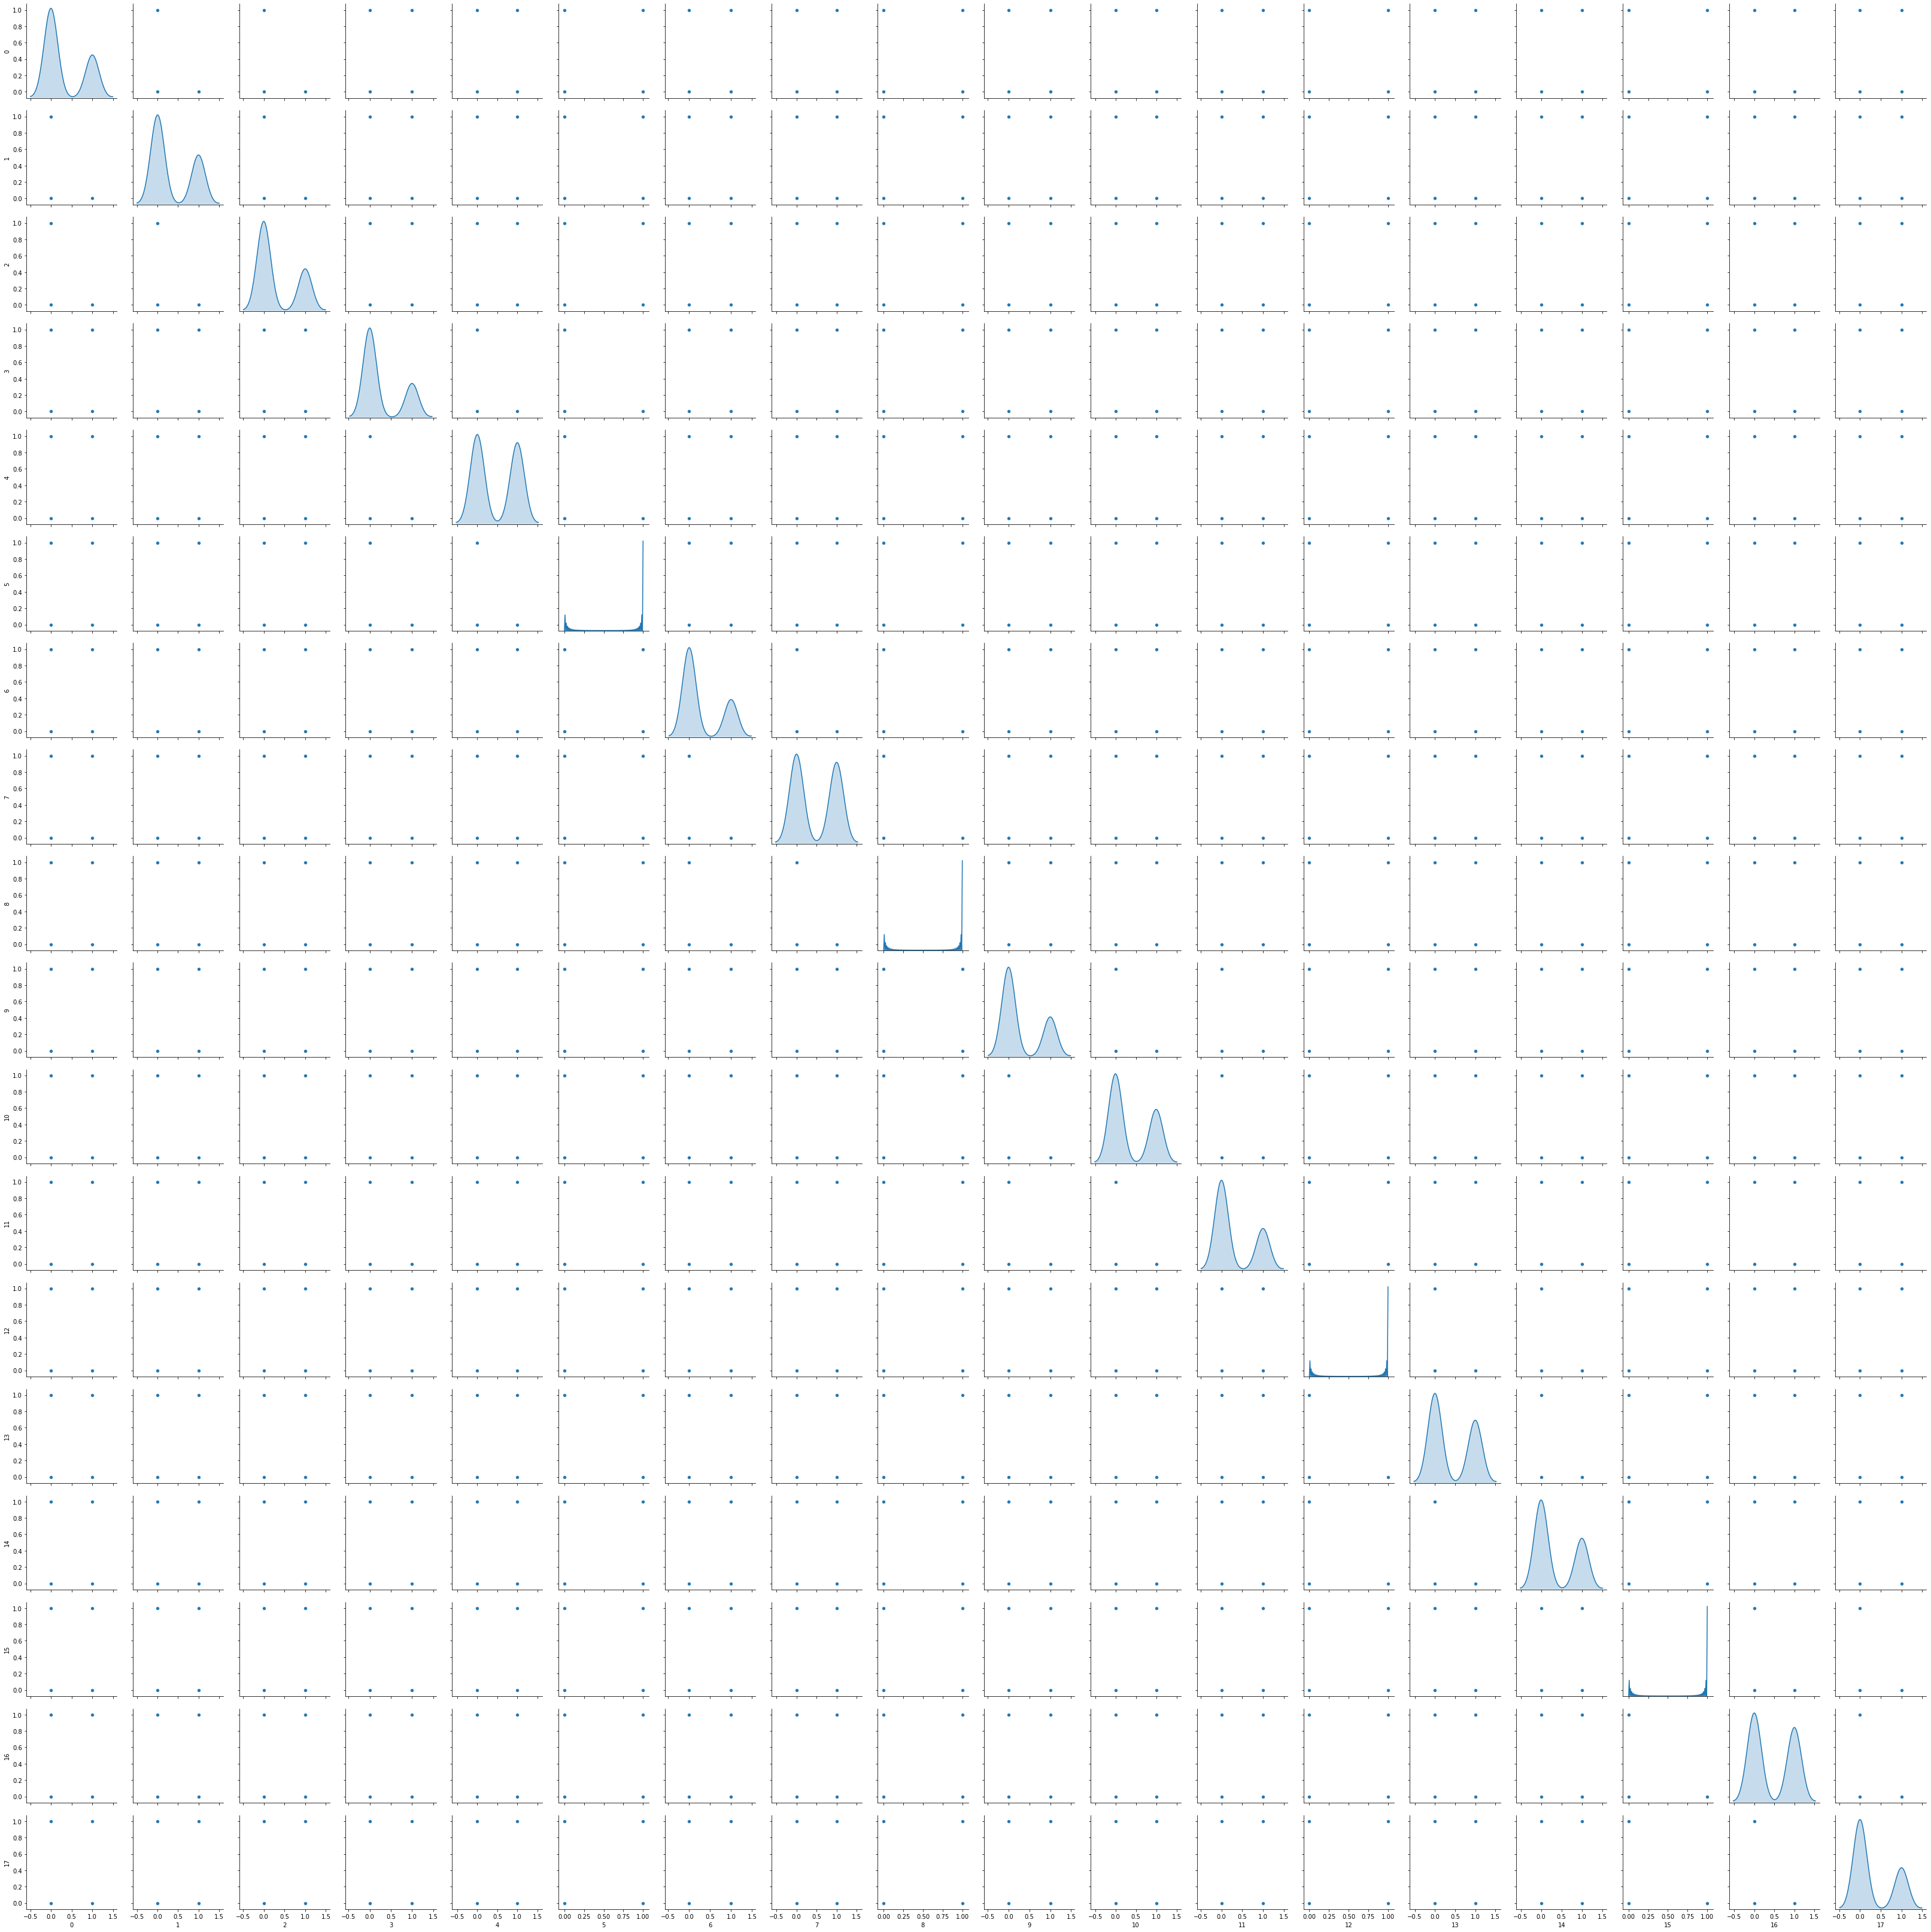

In [606]:
sns.pairplot(pd.DataFrame(X), diag_kind='kde')
#very clear there are 3 distinct clusters.

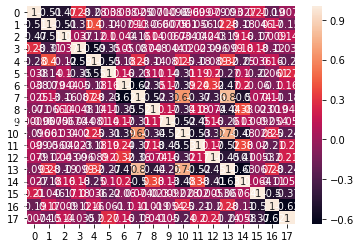

In [607]:
sns.heatmap(pd.DataFrame(X).corr(), annot = True)

In [608]:
from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit(train_set)

In [609]:
pca.components_

array([[-7.24136369e-02,  1.73972809e-01, -1.01559172e-01,
        -7.49052703e-02,  2.49002388e-01, -1.74097118e-01,
        -2.31053350e-01,  4.18532626e-01, -1.87479277e-01,
        -1.14797087e-01,  3.85276659e-01, -2.70479571e-01,
        -1.55758879e-01,  4.47499170e-01, -2.91740291e-01,
         4.85630125e-03,  1.52667296e-01, -1.57523597e-01],
       [-4.75185605e-01,  4.48891554e-01,  2.62940507e-02,
        -3.32736545e-01,  3.14361887e-01,  1.83746586e-02,
         7.00748322e-02, -2.13030662e-01,  1.42955830e-01,
         2.57372630e-01, -1.88054799e-01, -6.93178307e-02,
        -2.95229489e-02, -7.78096981e-02,  1.07332647e-01,
        -2.13790315e-01,  3.28236694e-01, -1.14446379e-01],
       [-1.18535243e-02, -2.73988025e-01,  2.85841549e-01,
         2.01947501e-01, -4.17711071e-01,  2.15763571e-01,
        -5.79894319e-02, -1.38656883e-02,  7.18551202e-02,
         9.85106303e-02,  1.28402362e-01, -2.26912993e-01,
        -2.29647787e-01,  7.50401190e-02,  1.54607668e

In [610]:
pca.explained_variance_

array([1.03956022e+00, 4.89810673e-01, 3.76679459e-01, 3.61899147e-01,
       3.02676213e-01, 2.88882750e-01, 2.52379854e-01, 2.31065248e-01,
       2.00016341e-01, 1.70424192e-01, 1.02545951e-01, 5.30046767e-02,
       2.79102086e-32, 1.63085284e-32, 1.18163804e-32, 3.40910980e-33,
       2.42196949e-33, 8.49355903e-35])

In [611]:
pca.explained_variance_ratio_

array([2.68693479e-01, 1.26600587e-01, 9.73597416e-02, 9.35394980e-02,
       7.82322402e-02, 7.46670658e-02, 6.52322202e-02, 5.97230679e-02,
       5.16979060e-02, 4.40492703e-02, 2.65048891e-02, 1.37000346e-02,
       7.21390729e-33, 4.21523944e-33, 3.05416108e-33, 8.81147198e-34,
       6.26002610e-34, 2.19531672e-35])

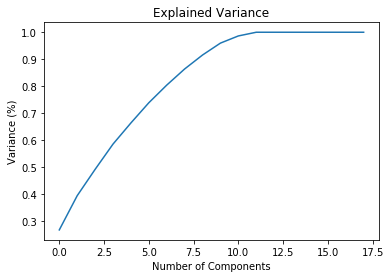

In [612]:
var_expl = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(var_expl)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [613]:
pca = PCA(n_components=10)
train_set = pca.fit_transform(train_set)
test_set = pca.transform(test_set)

In [614]:
pca.explained_variance_ratio_

array([0.26869348, 0.12660059, 0.09735974, 0.0935395 , 0.07823224,
       0.07466707, 0.06523222, 0.05972307, 0.05169791, 0.04404927])

In [615]:
pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.21429681, -0.30905586, -0.36415638, ..., -0.10815636,
         0.01709026,  0.3463237 ],
       [-0.15037526, -1.34723634, -0.5319487 , ...,  0.03340136,
         0.27988866, -0.18495616],
       [-0.93987198,  0.83208713, -0.69562644, ...,  0.11193231,
         0.40861255,  0.20143754],
       ...,
       [ 1.35996565,  0.39199994,  0.05760053, ...,  0.46918259,
        -0.57338904, -0.52207653],
       [ 1.61247086, -0.50248683,  0.00217625, ..., -0.09839023,
         0.10351508, -0.06709237],
       [ 0.5626136 ,  0.21474643, -0.24570969, ...,  0.92080142,
        -0.01450442,  0.62472739]])

In [616]:
pca.explained_variance_ratio_

array([0.26965196, 0.12155751, 0.09882419, 0.09456631, 0.0829855 ,
       0.07541197, 0.06675077, 0.05712034, 0.04913119, 0.04479745])

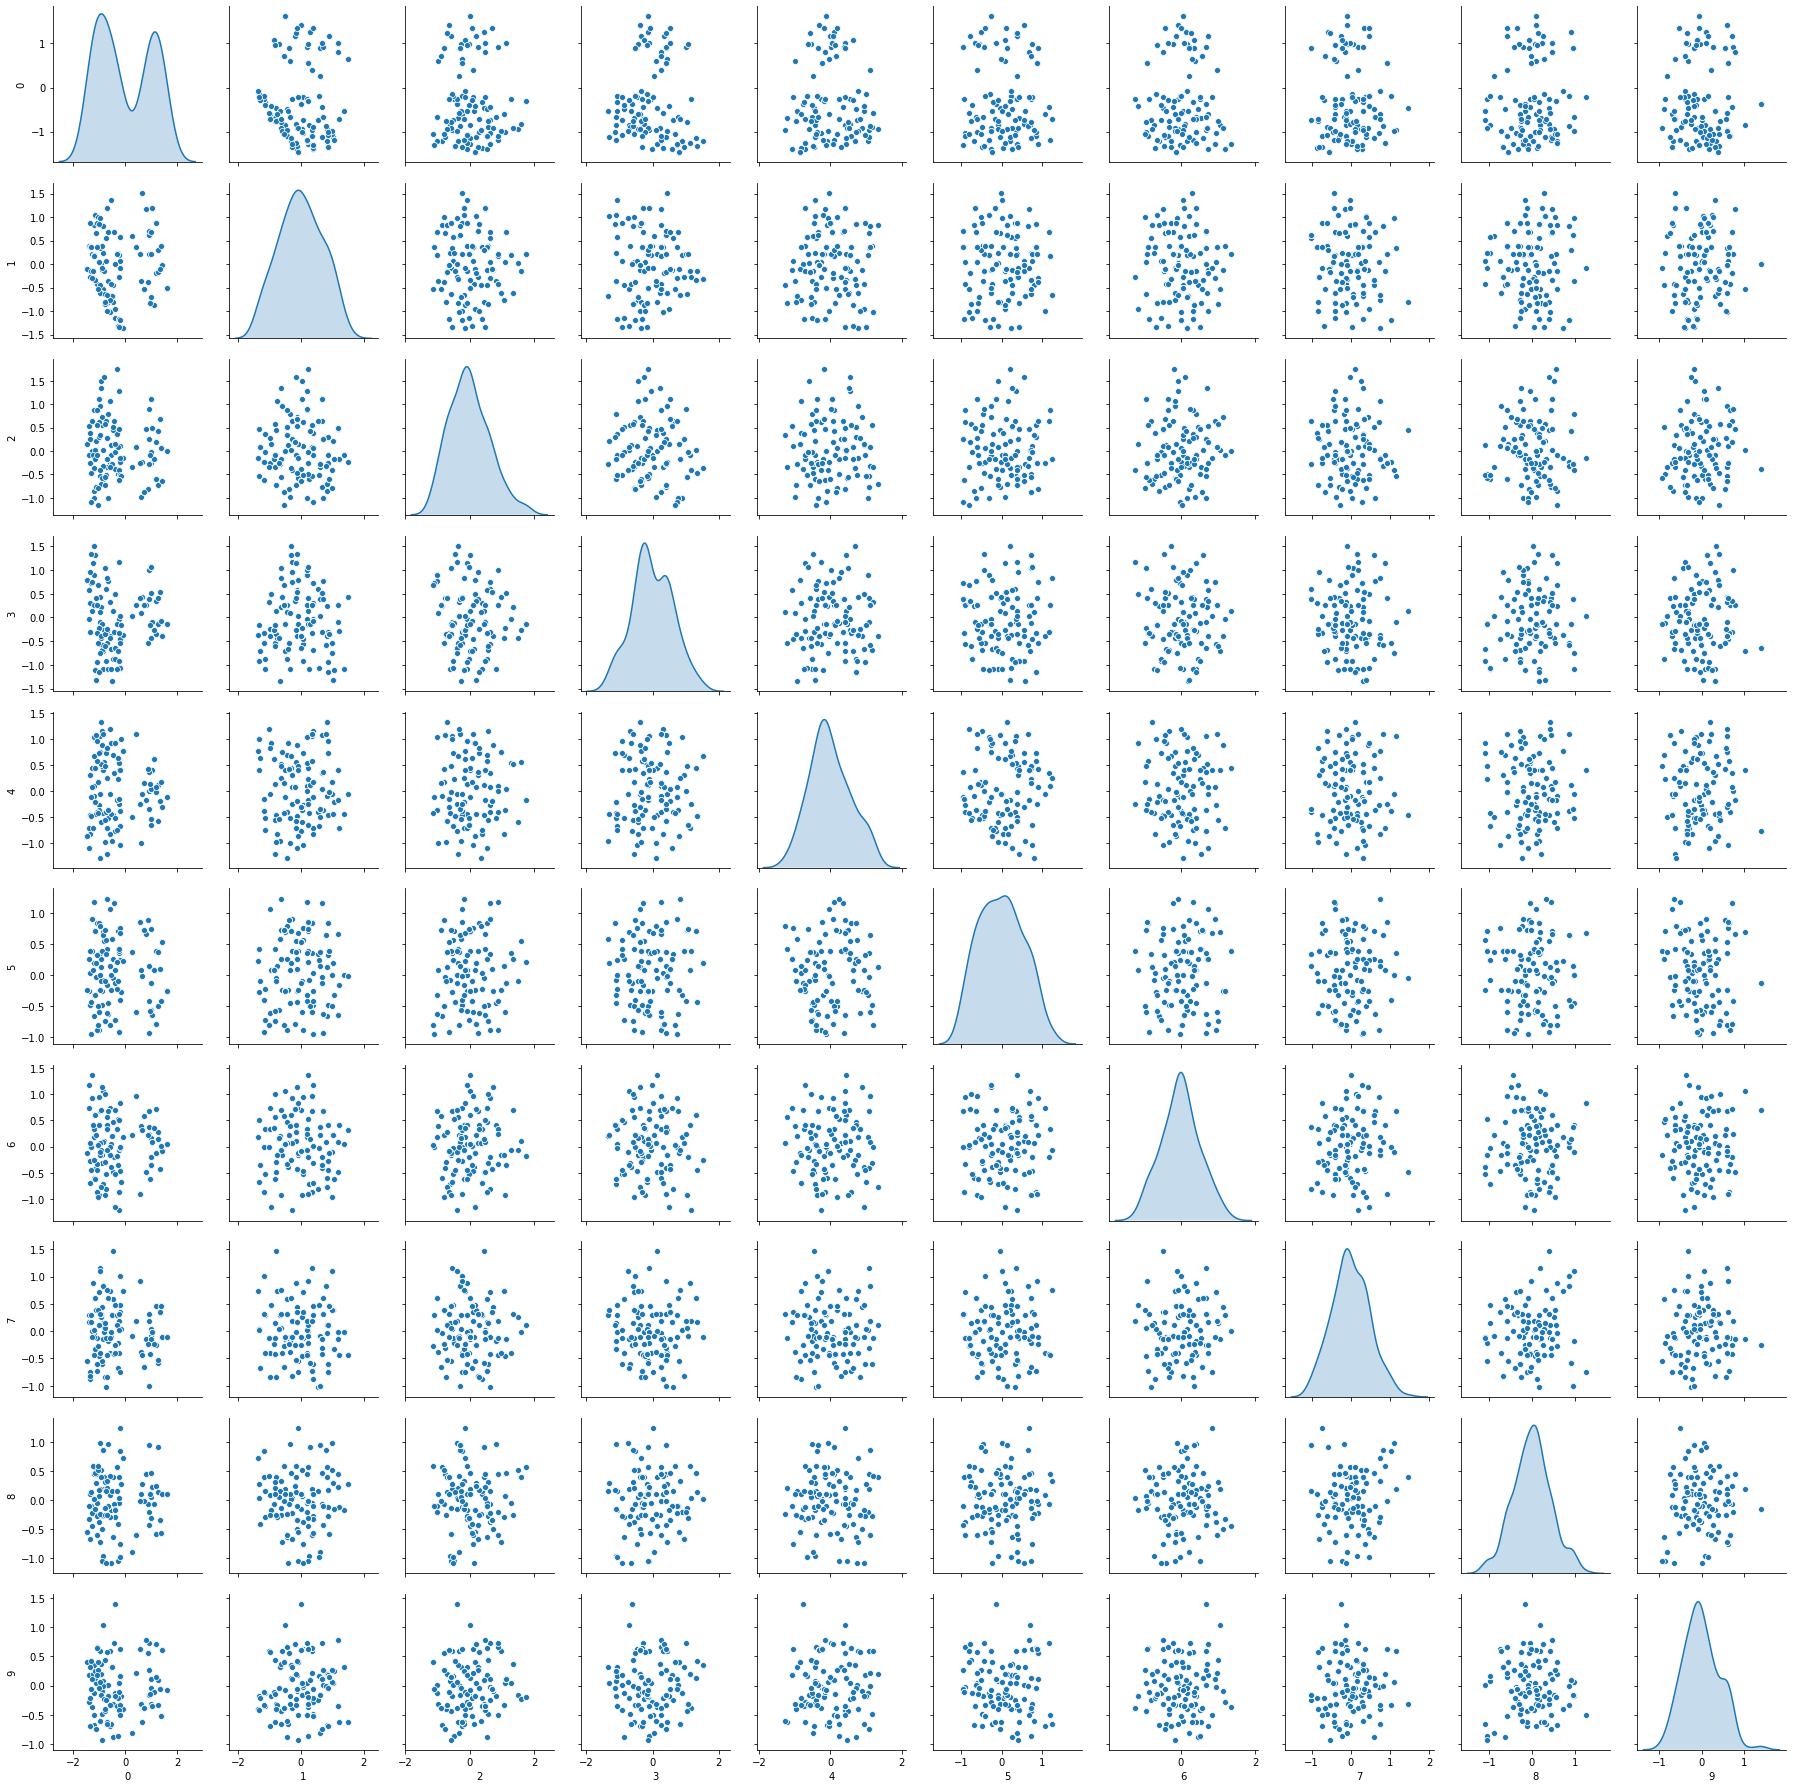

In [617]:
sns.pairplot(pd.DataFrame(X_PCA), diag_kind='kde')

In [618]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_PCA)
  labels1 = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,933.695014
1,2,699.324490
2,3,627.315156
3,4,571.635575
4,5,526.512150
5,6,485.484485
6,7,472.800271
7,8,444.412433
8,9,423.864071
9,10,402.921820


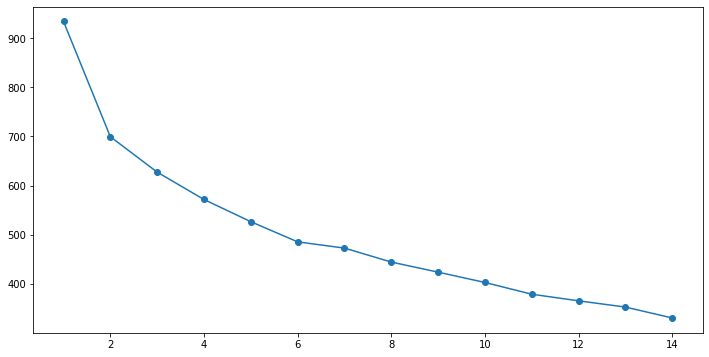

In [619]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [620]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [621]:
kmeans.fit(train_set)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [622]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(train_set))
centroid_df

,0.884554,0.426823,-0.828881,-0.183755,-0.117557,0.998663,-0.111714,0.089504,0.100934,0.575783
,-0.220479,1.300242,-0.361077,-0.046952,0.670615,0.455001,0.970128,0.259727,0.372289,-0.410802
,-1.068008,0.113592,1.007087,-0.589733,-0.888307,-0.763387,-0.079154,-0.296736,0.451778,-0.151372
,-0.512143,1.110407,-0.302245,-0.861318,0.173142,-0.806170,0.224189,0.613167,-0.375222,-0.114083
,1.286053,-0.400655,0.279761,-0.276495,0.233667,-0.011917,0.223838,-0.296906,-0.585002,-0.595004
,0.898340,-0.566359,-0.115616,0.463318,-0.053180,-0.184427,-0.829218,0.737562,0.966954,0.001848
,-1.355838,-0.689196,-0.543792,0.602114,1.205803,-0.374090,0.164914,-0.065013,-0.180282,-0.165457
,-1.111582,0.040711,0.877243,-0.458558,-0.385715,-0.873681,0.565240,0.761909,0.091068,-0.023959
,-0.822334,0.667724,-1.055146,-0.102944,-0.107774,-0.678997,-0.357817,0.919895,-0.352439,-0.196066
,1.532439,0.523422,0.017626,-0.143772,0.143485,-0.308975,-0.030192,0.037552,0.053981,-0.065030
,-1.355838,-0.689196,-0.543792,0.602114,1.205803,-0.374090,0.164914,-0.065013,-0.180282,-0.165457


In [623]:
prediction = kmeans.predict(train_set)
prediction

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1])

In [624]:
prediction.shape

(200,)

In [625]:
colnames = ["PC1",'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
train_df = pd.DataFrame(train_set,columns=colnames)
train_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.884554,0.426823,-0.828881,-0.183755,-0.117557,0.998663,-0.111714,0.089504,0.100934,0.575783
1,-0.220479,1.300242,-0.361077,-0.046952,0.670615,0.455001,0.970128,0.259727,0.372289,-0.410802
2,-1.068008,0.113592,1.007087,-0.589733,-0.888307,-0.763387,-0.079154,-0.296736,0.451778,-0.151372
3,-0.512143,1.110407,-0.302245,-0.861318,0.173142,-0.806170,0.224189,0.613167,-0.375222,-0.114083
4,1.286053,-0.400655,0.279761,-0.276495,0.233667,-0.011917,0.223838,-0.296906,-0.585002,-0.595004


In [626]:
train_df['Groups'] = prediction
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
PC1       200 non-null float64
PC2       200 non-null float64
PC3       200 non-null float64
PC4       200 non-null float64
PC5       200 non-null float64
PC6       200 non-null float64
PC7       200 non-null float64
PC8       200 non-null float64
PC9       200 non-null float64
PC10      200 non-null float64
Groups    200 non-null int32
dtypes: float64(10), int32(1)
memory usage: 16.5 KB


In [627]:
df_bankrupcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
IR                 250 non-null int32
MR                 250 non-null int32
FF                 250 non-null int32
Credibility        250 non-null int32
Competitiveness    250 non-null int32
OR                 250 non-null int32
dtypes: int32(6)
memory usage: 5.9 KB


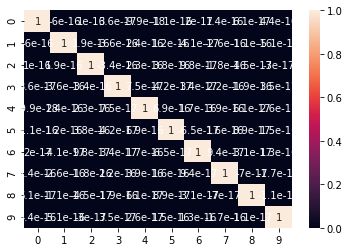

In [628]:
sns.heatmap(pd.DataFrame(train_set).corr(), annot = True)

In [629]:
kmeans.fit(test_set)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [630]:
prediction = kmeans.predict(test_set)
prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0])

In [631]:
test_df = pd.DataFrame(test_set,columns=colnames)
test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.884554,0.426823,-0.828881,-0.183755,-0.117557,0.998663,-0.111714,0.089504,0.100934,0.575783
1,0.962145,-1.047753,0.899419,-0.427780,0.317918,-0.014541,0.006817,0.096376,0.305189,-0.446142
2,-0.412252,-0.005145,1.362403,-0.284465,-1.117776,-0.401038,0.123228,-0.128173,0.558716,-0.110230
3,-1.200156,-0.362506,-0.218368,0.898489,1.145322,0.873090,0.245632,0.128543,-0.093634,-0.260506
4,-1.477391,0.022020,0.268003,0.639715,-0.588033,-0.639731,-0.840660,-0.486743,-0.265353,0.380037


In [632]:
test_df['Group'] = prediction
test_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Group
0,0.884554,0.426823,-0.828881,-0.183755,-0.117557,0.998663,-0.111714,0.089504,0.100934,0.575783,0
1,0.962145,-1.047753,0.899419,-0.427780,0.317918,-0.014541,0.006817,0.096376,0.305189,-0.446142,0
2,-0.412252,-0.005145,1.362403,-0.284465,-1.117776,-0.401038,0.123228,-0.128173,0.558716,-0.110230,1
3,-1.200156,-0.362506,-0.218368,0.898489,1.145322,0.873090,0.245632,0.128543,-0.093634,-0.260506,1
4,-1.477391,0.022020,0.268003,0.639715,-0.588033,-0.639731,-0.840660,-0.486743,-0.265353,0.380037,1


In [633]:
#df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

#df_labels['labels'] = df_labels['labels'].astype('category')

In [634]:
#labels = le.fit_transform(labels)

In [635]:
#train_set, test_set, train_labels, test_labels = train_test_split(df_bankrupcy, labels, test_size=0.20, random_state=7)

In [646]:
from sklearn import svm

In [647]:
svc = svm.SVC(gamma = 0.025, C=3)

In [648]:
train_value = np.array(train_df)

In [649]:
test_value = np.array(test_df)

In [650]:
svc.fit(train_value,train_labels)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [651]:
y_predict = svc.predict(test_value)

In [652]:
svc.score(test_value, test_labels)

0.94

In [653]:
svc.score(train_value, train_labels)

0.99

In [654]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, y_predict))

[[16  0]
 [ 3 31]]
